## NLP using the Nairaland data set
<p><img style="float: right; margin:5px 20px 5px 1px; width:30%" src="images/1846558_nairaland_jpeg17f3033a54a45a2f5c3b8e1a93cae65d.jpg"></p>
<p></p>
<p>Nairaland is Nigeria's foremost talk forum. Topics available for discussion range from Politics to Science. Currently, there are about 2.4m registered members on the website and 5.6m created topics. The website opened shop sometime around March 2005 and since then has served the country quite well in its reporting.</p>

Though it aggregates news, most of its topics are create by users who visit the website daily. Lately, however, special moderators have taken up this task. Because of its prominence, the website's frontpage is coveted by many who posts different topics on the site. This has resulted in varying topics and diverse opinions gracing the frontpage over time. Using `BeautifulSoup`, we parsed its frontpage and retrieved a whole year's worth of topics for analysis. This is available [here](https://raw.githubusercontent.com/manchuran/datasets/master/nairaland/basic/nl_dataset.csv) for those who many be interested in additional analysis using the data.

### 1. Exploratory Analysis

In [140]:
#Load required libraries
library(readr)
library(ggplot2)
library(dplyr)
library(tidyr)
library(lubridate)

In [7]:
#Read in data
nldata <- read_csv('https://raw.githubusercontent.com/manchuran/datasets/master/nairaland/basic/nl_dataset.csv')
head(nldata)

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_double(),
  link = col_character(),
  title = col_character(),
  section = col_character(),
  author = col_character(),
  frontPageDate = col_datetime(format = ""),
  postedDate = col_datetime(format = "")
)


X1,link,title,section,author,frontPageDate,postedDate
0,https://www.nairaland.com/5898739/betsy-obaseki-visits-uwaila-omozuwas,Rape In Church: Edo State First Lady Pays Condolence Visit To Family Of Late Uwa,Politics,Osamudamen,2020-06-02 19:45:00,2020-06-02 16:12:00
1,https://www.nairaland.com/5899069/produce-nysc-certificate-tribunal-ewhrudjakpo,Bayelsa: Produce Your NYSC Certificate – Tribunal Orders Governor Diri’s Deputy,Politics,oshozondii,2020-06-02 19:33:00,2020-06-02 19:26:00
2,https://www.nairaland.com/5899018/covid-19-governor-ikpeazus-two-aides,COVID-19: Governor Ikpeazu's Two Aides Test Positive,Health,EBMedia,2020-06-02 19:14:00,2020-06-02 18:49:00
3,https://www.nairaland.com/5898966/man-kills-friend-over-ownership,Man Kills His Friend Over Ownership Of Girlfriend In Bauchi,Crime,Islie,2020-06-02 19:09:00,2020-06-02 18:18:00
4,https://www.nairaland.com/5898916/pastor-emmanuel-bileya-wife-julianna,Pastor And His Wife Killed In Taraba State (Photos),Crime,ganisucks,2020-06-02 18:34:00,2020-06-02 17:47:00
5,https://www.nairaland.com/5898953/churches-mosques-remain-closed-lagos,Churches And Mosques To Remain Closed In Lagos,Religion,dre11,2020-06-02 18:21:00,2020-06-02 18:06:00


In [380]:
#Examine summary statistics
summary(nldata[,-1])

     link              title             section             author         
 Length:28800       Length:28800       Length:28800       Length:28800      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 frontPageDate                   postedDate                 
 Min.   :2019-05-31 15:38:00   Min.   :2011-05-08 00:33:00  
 1st Qu.:2019-08-09 22:43:45   1st Qu.:2019-08-08 21:48:45  
 Median :2019-10-18 07:42:00   Median :2019-10-17 00:07:00  
 Mean   :2019-11-05 15:16:23   Mean   :2019-11-02 21:27:50  
 3rd Qu.:2020-01-27 11:40:30   3rd Qu.:2020-01-26 15:31:00  
 Max.   :2020-06-02 19:45:00   Max.   :2020-06-02 19:26:00  

The data has 28.800 records which range from 31-05-2019 to 02-06-2020.

The data has six attributes. There is a `link` attribute which is the link to the frontpage thread, `title` which refers to the title of the frontpage thread, `section` where the thread is located on Nairaland. The `author` attribute refers to the creator of the thread. `frontPageDate` is the date the thread was posted to the front page of the website, and `postedDate` is the date the thread was created. According to the metadata, this is a year's worth of data from 2019 through to June 2020.

In [16]:
#Show frequency of sections on front page
nldata_per_section <- nldata %>% group_by(section) %>% 
    summarize(count = n()) %>% 
    arrange(desc(count))

nldata_per_section %>% head(10)

section,count
Politics,9892
Celebrities,4095
Crime,2932
Sports,2023
Health,1581
Religion,1090
Travel,1090
Education,892
Romance,858
Business,615


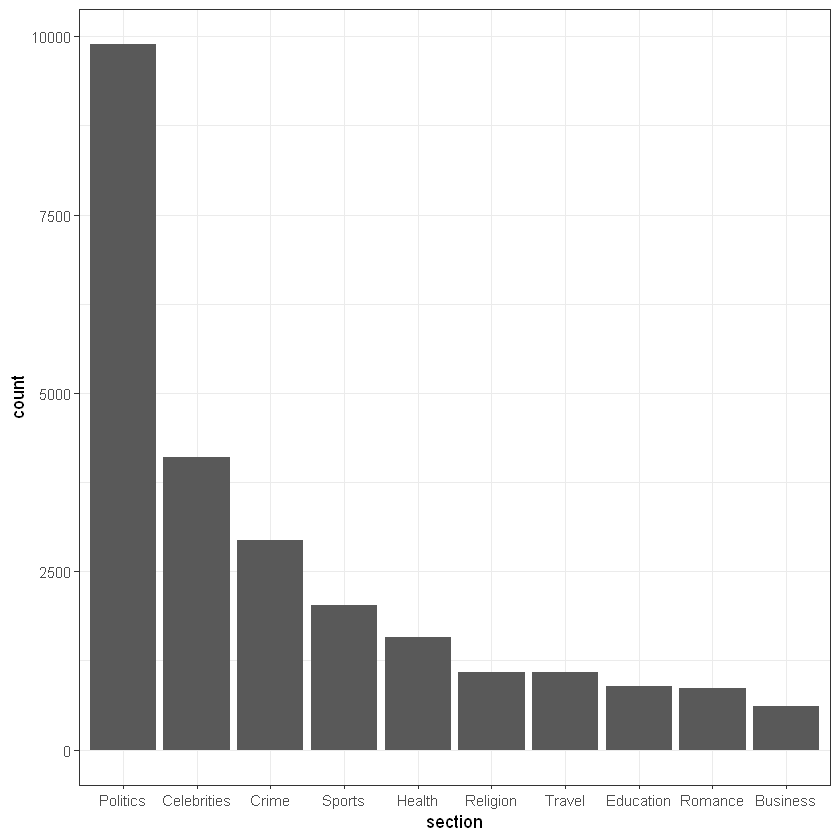

In [51]:
# Plot top sections
nldata_per_section %>% head(10) %>%
    ggplot(aes(x = section, y = count)) + geom_col() + scale_x_discrete(limits=nldata_per_section$section[1:10]) +
        theme_bw()

The most frequent section on the frontpage is Politics, followed by Celebrity at nearly half the number of Politics thread. Crime comes next. If we assume that the discussions on Nairaland is representative of the wider discussions in Nigeria, then one could very much suggest that politics is the dominant topic among Nigerians, followed by news regarding Celebrities. Health seems to have featured prominently in the top 10 as a result of the flood of news related to Covid-19 in the past months.

Using the same technique as above, we could also examine who the most frequent author is.

In [61]:
#Show them most prolific author over the year
nldata_per_authors <- nldata %>% group_by(author) %>% 
    summarize(count = n()) %>% arrange(desc(count))
nldata_per_authors %>% head(10)

author,count
dre11,536
Islie,508
ijustdey,347
lalasticlala,342
fergie001,317
OEPHIUS,263
naptu2,250
References,246
AlexReports,196
ogbiwa,184


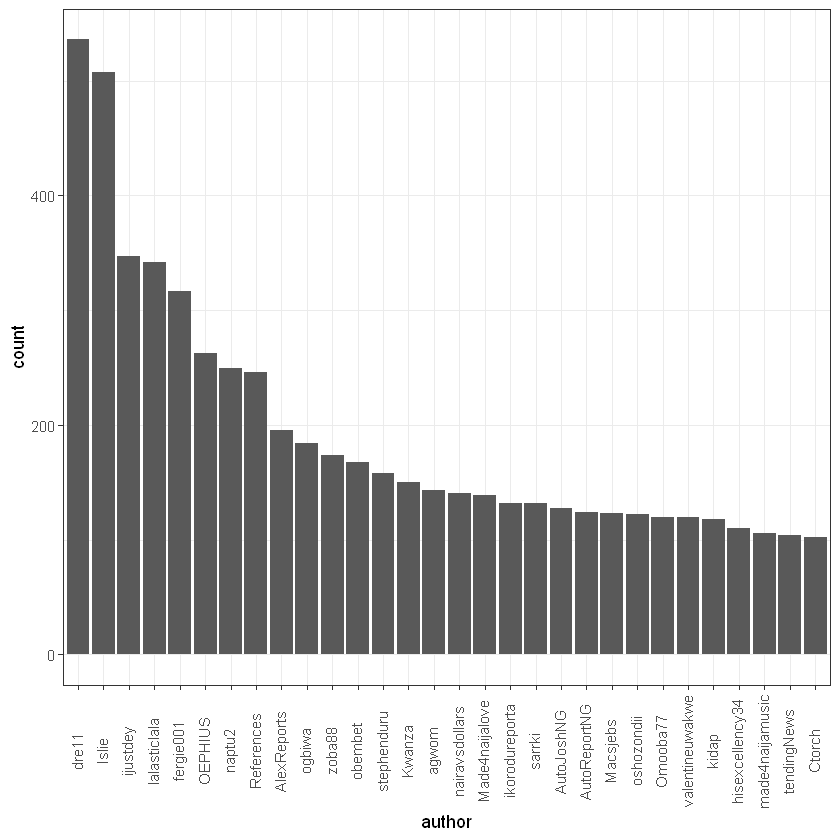

In [68]:
# Plot top 30 authors
nldata_per_authors %>% head(30) %>%
    ggplot(aes(x = author, y = count)) + geom_col() + scale_x_discrete(limits=nldata_per_author$author[1:30]) +
        theme_bw() + theme(axis.text.x = element_text(angle=90, vjust=.3))

The most prolific author is dre11 with 536 topics. The next most prolific is Islie with 508 topics posted on the frontpage. These high frequencies of post from both seem to suggest that they are both moderators employed to do this job. Others in the lower half of the plot have post numbers that are fairly same. These appear to be regular users.

When we examine the amount of posts by each author for each section, we see that dre11 still has a higher number of posts, but posted more in Politics. Indeed, all the top three authors posted more in Politics than in any other section. However, lalasticlala posted more under Celebrities than in any other section. Ogbiwa, on the other hand, posted most under Sports.

In [78]:
nldata %>% select(section, author) %>% 
    filter(author %in% nldata_per_authors$author[1:10]) %>% 
    with(table(section, author)) %>% 
    as.data.frame %>% 
    arrange(desc(Freq)) %>% 
    head(15)

section,author,Freq
Politics,dre11,367
Politics,Islie,332
Politics,ijustdey,226
Politics,OEPHIUS,186
Sports,ogbiwa,178
Celebrities,lalasticlala,173
Politics,fergie001,168
Politics,naptu2,123
Politics,References,119
Celebrities,AlexReports,85


We now retrieve the hour posts were made to examine its distribution.

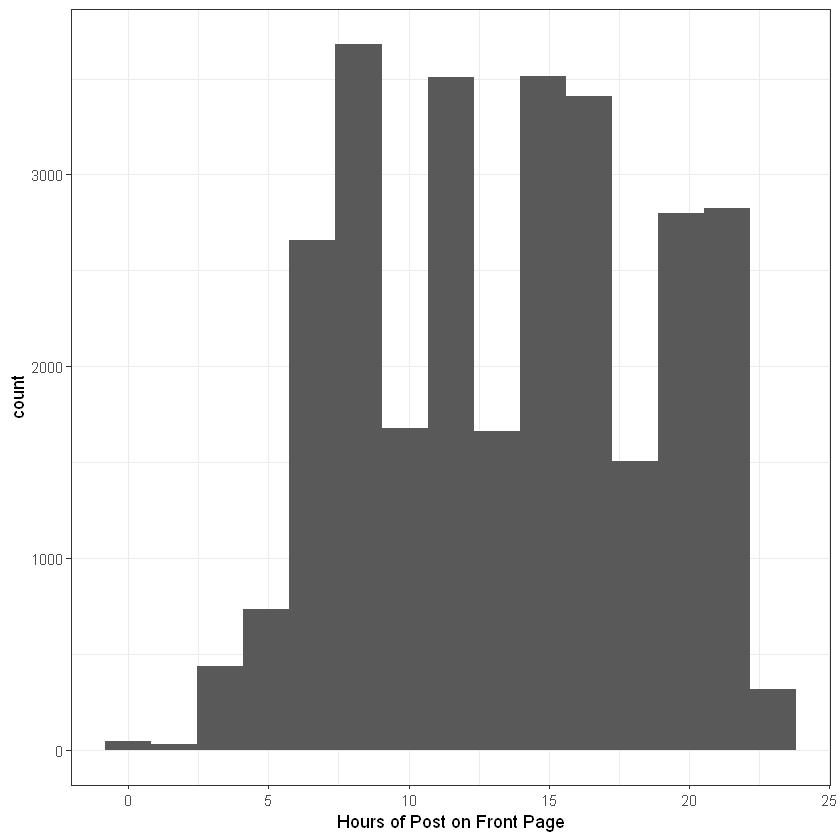

In [91]:
nldata %>% mutate(postHour = hour(frontPageDate)) %>% 
    ggplot(aes(x=postHour)) + geom_histogram(bins=15) + theme_bw() + xlab("Hours of Post on Front Page")

The hours post were placed on the front page reveals a noticeable pattern: very little posts were made around the hours of midnight and 3 in the mornings. Most posts were put on the front page in the early morning hours and at night. This shows that the greatest activities take place during the day time.

Could the same be true for hours when posts were created?

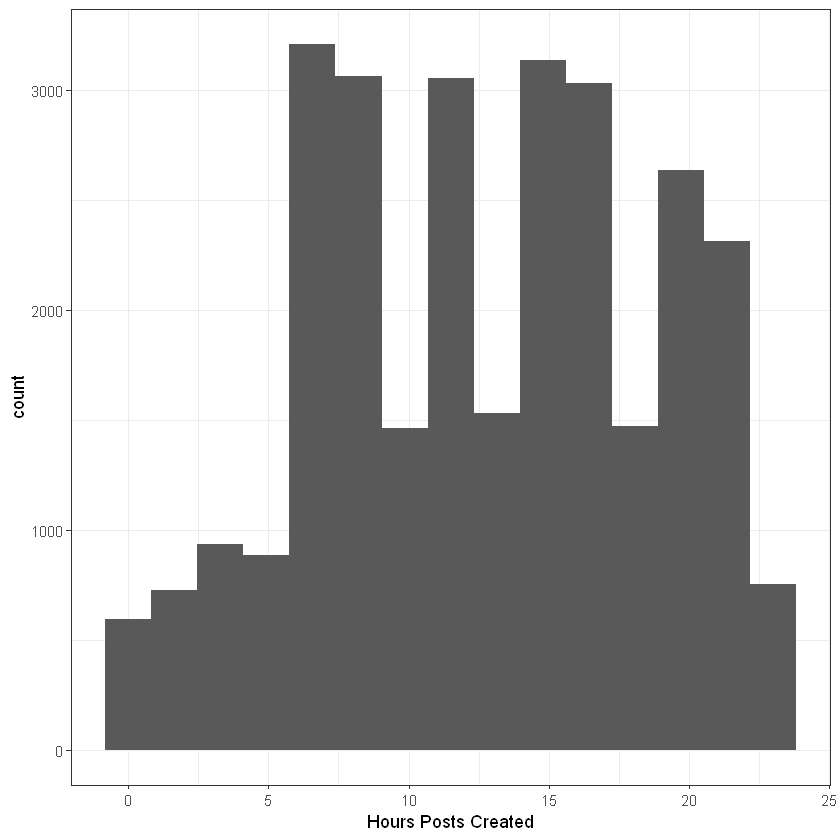

In [92]:
#Hours posts are created on Nairaland
nldata %>% mutate(createHour = hour(postedDate)) %>% 
    ggplot(aes(x=createHour)) + geom_histogram(bins=15) + theme_bw() + xlab("Hours Posts Created")

Though it is noticeable that most posts are also created during the day time, there are significantly more posts created during midnight and early morning hours than there are posts put on the front page during these hours. These shows that Nairlanders converse at all hours. The moderators who place posts on the front page, however, must go for some rest at late hours.

And for the top poster? At what hours does he place posts on the front page? If he were indeed a moderator employed to work during day hours, these should happen most during the day time?

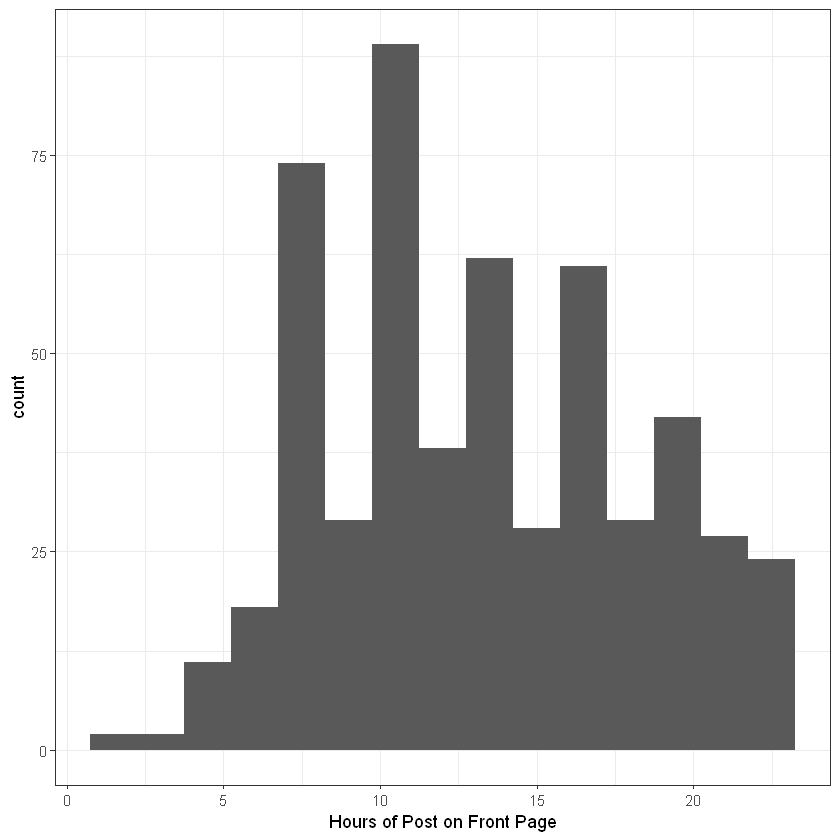

In [96]:
#Get hours of post on front page by top author
nldata %>% filter(author == "dre11") %>% select(author, frontPageDate) %>% mutate(postHour = hour(frontPageDate)) %>% 
    ggplot(aes(x=postHour)) + geom_histogram(bins=15) + theme_bw() + xlab("Hours of Post on Front Page")

It appears the author, dre11, posts even during early morning hours, and many times during late hours. However, many more posts are during work hours. 

Examining this further for the top 10 posters on the front page, we see that posters like AlexReports and lalasticlala have mainly only posted in the morning hours from about 6am over the past year. All others have minor activity in the early morning hours, but reserve most of their posting to the day time. Lalasticala seems to have his major active hour at about 8 in the morning.

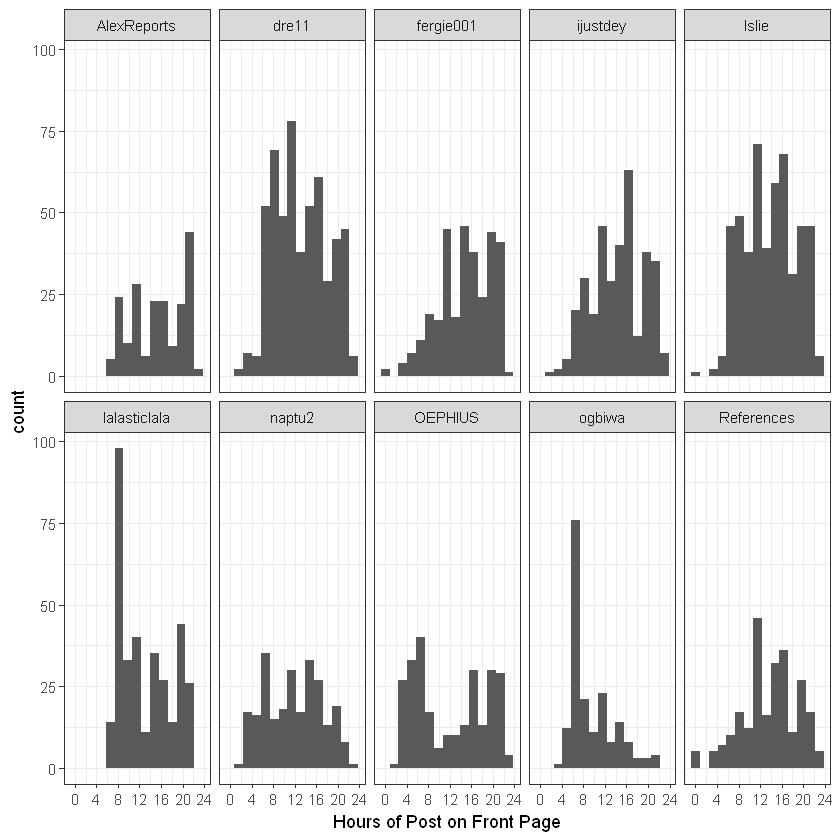

In [122]:
#Get hours of post on front page by top 10 authors
nldata %>% filter(author %in% nldata_per_authors$author[1:10]) %>% 
    select(author, frontPageDate) %>% 
    gather(key=key, value=value, -author) %>%
    ggplot(aes(x=hour(value))) + geom_histogram(bins=15) + facet_wrap(.~author, nrow=2) + theme_bw() + 
        scale_x_continuous(breaks =seq(0,24,4)) + xlab("Hours of Post on Front Page")

Now, we group the number of posts created per month and examine its plot

In [169]:
nlmonthdata <- nldata %>% mutate(monthyear = paste0(month(frontPageDate, label=TRUE, abbr=TRUE), year(frontPageDate))) %>% 
group_by(monthyear) %>% summarize(count=n())
nlmonthdata

monthyear,count
Apr2020,1679
Aug2019,3301
Dec2019,1999
Feb2020,1481
Jan2020,1735
Jul2019,3374
Jun2019,2830
Jun2020,121
Mar2020,1739
May2019,50


In [170]:
#Create a new dataframe with monthyear and use to sort original dataframe
monthyear = c("May2019", "Jun2019", "Jul2019", "Aug2019", "Sep2019", "Oct2019", "Nov2019",
                              "Dec2019", "Jan2020", "Feb2020", "Mar2020", "Apr2020", "May2020", "Jun2020")
sort_df <- data.frame(monthyear=(monthyear), ind = 1:length(monthyear))
nlmonthdata <- inner_join(nlmonthdata, sort_df, by="monthyear") %>% arrange(ind)
nlmonthdata %>% head(3)

Warning message:
"Column `monthyear` joining character vector and factor, coercing into character vector"

monthyear,count,ind
May2019,50,1
Jun2019,2830,2
Jul2019,3374,3


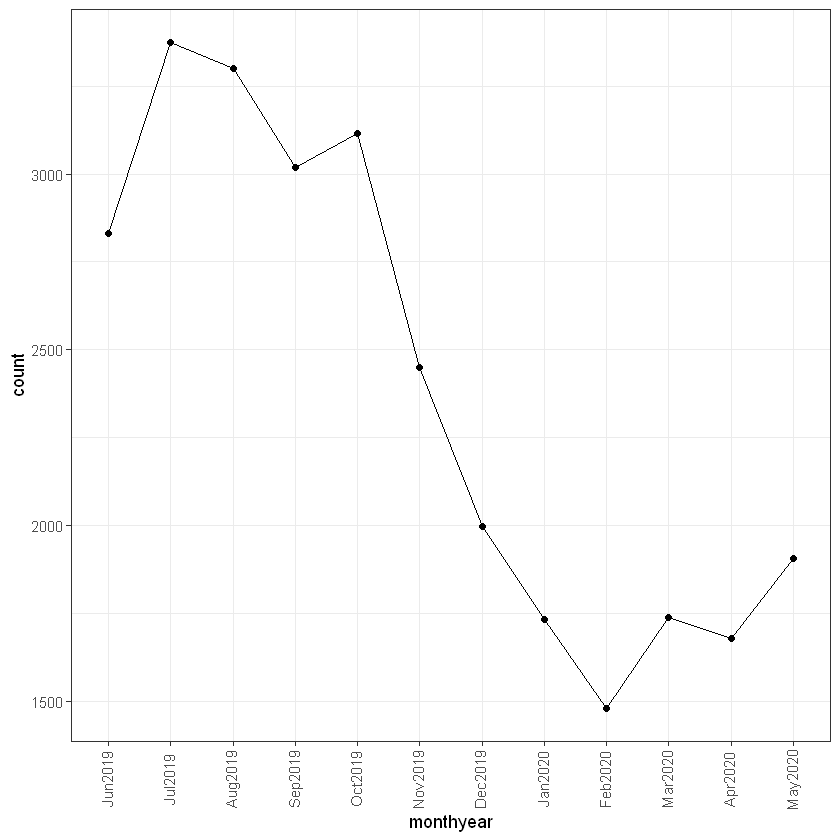

In [167]:
#Plot posts per month
nlmonthdata[-c(1,14),] %>% 
    ggplot(aes(x=monthyear, y=count, group=1)) + geom_line() + geom_point() + 
    scale_x_discrete(limits=nlmonthdata$monthyear[2:13]) + 
    theme_bw() + theme(axis.text.x = element_text(angle=90, vjust=.3))

We have left out the first and last months in the data set as the data collected for these periods are not for an entire month. We see quite clearly a decreasing trend in the number of posts placed on the front page per month. The decrease started from October and lasted through to Februrary, before it changed direction. There was a rush of news on Covid-19 around this period. Could this have accounted for the uptick?

Next, we look at the trend for each section.

In [184]:
nldata %>% select(section, frontPageDate) %>% mutate(monthyear = paste0(month(frontPageDate, label=TRUE, abbr=TRUE), year(frontPageDate))) %>% 
group_by(monthyear, section) %>% summarize(count=n()) %>%
inner_join(sort_df, by="monthyear") %>% arrange(ind) %>% head(7)

Warning message:
"Column `monthyear` joining character vector and factor, coercing into character vector"

monthyear,section,count,ind
May2019,Business,3,1
May2019,Celebrities,13,1
May2019,Crime,4,1
May2019,Culture,1,1
May2019,Education,3,1
May2019,General,1,1
May2019,Phones,1,1


Warning message:
"Column `monthyear` joining character vector and factor, coercing into character vector"Warning message:
"Removed 9 row(s) containing missing values (geom_path)."

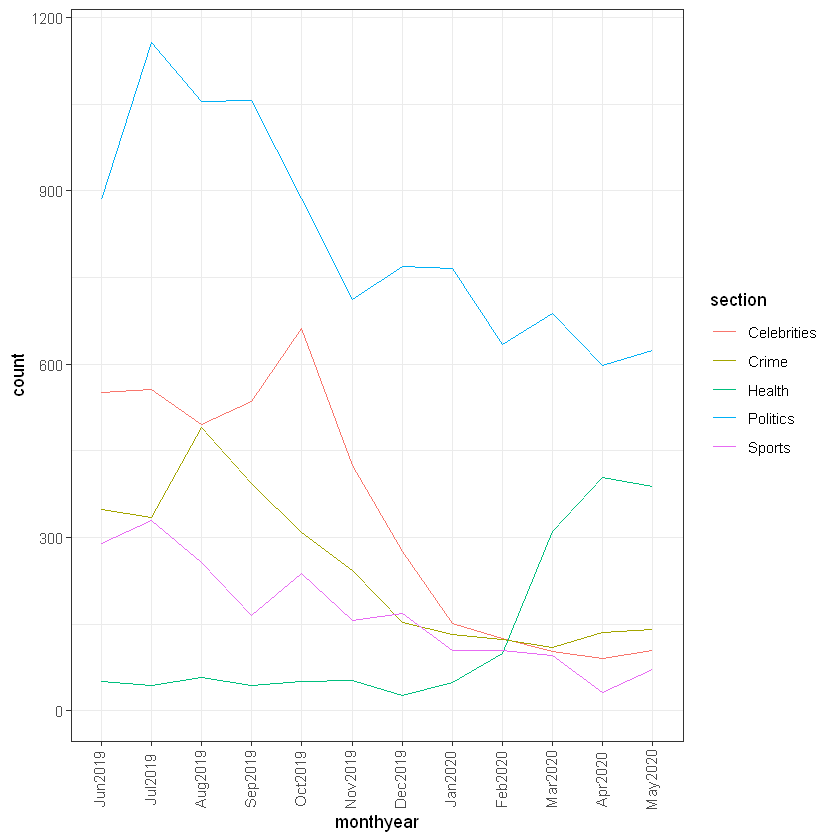

In [183]:
#Extract top sections
nlmonthdata_top_sections <- nldata %>% select(section, frontPageDate) %>% 
    mutate(monthyear = paste0(month(frontPageDate, label=TRUE, abbr=TRUE), year(frontPageDate))) %>% 
    group_by(monthyear, section) %>% 
    filter(section %in% c("Politics", "Health", "Crime", "Celebrities", "Sports")) %>% 
    summarize(count=n()) %>%
    inner_join(sort_df, by="monthyear") %>% arrange(ind) 

#Plot top sections
nlmonthdata_top_sections %>%
    ggplot(aes(x=monthyear, y =count, group=section, color=section)) + geom_line()  + 
        scale_x_discrete(limits=nlmonthdata$monthyear[2:13]) + 
        theme_bw() + theme(axis.text.x = element_text(angle=90, vjust=.3))

When the posts for the top sections are examined over time, we see that while all other sections have generally trended
downwards, health has trended upwards. This upward trend started mainly in February of 2020 when the news rush about the coronavirus pandemic started.

Is the decrease in number of posts from around October to November significant?
We can use a t-test to check this.

We extract first the daily data, and calculate how many posts are made per day for each month.


In [194]:
nldata_daily <- nldata %>% mutate(monthyear = paste0(month(frontPageDate, label=TRUE, abbr=TRUE), year(frontPageDate)),
                 daymonthyear = paste0(day(frontPageDate), month(frontPageDate, label=TRUE, abbr=TRUE), year(frontPageDate))) %>% 
            select(monthyear,daymonthyear) %>% group_by(daymonthyear) %>% summarize(count=n())
nldata_daily %>% head(7)

daymonthyear,count
10Apr2020,55
10Aug2019,92
10Dec2019,63
10Feb2020,35
10Jan2020,56
10Jul2019,122
10Jun2019,64


Next, we extract the data for September and October to make an initial comparison, before checking if there is a significant difference in the decrease from October to November.

In [203]:
library(DescTools)

In [199]:
t.sep <- nldata_daily %>% filter(daymonthyear %like% "%Sep%")
t.oct <- nldata_daily %>% filter(daymonthyear %like% "%Oct%")
t.nov <- nldata_daily %>% filter(daymonthyear %like% "%Nov%")
t.dec <- nldata_daily %>% filter(daymonthyear %like% "%Dec%")

In [201]:
t.test(t.sep$count, t.oct$count)


	Welch Two Sample t-test

data:  t.sep$count and t.oct$count
t = 0.012042, df = 56.259, p-value = 0.9904
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13.86717  14.03492
sample estimates:
mean of x mean of y 
 100.6000  100.5161 


We see that there is not a lot of difference in the mean values of the post distribution for September and October.

In [202]:
t.test(t.oct$count, t.nov$count)


	Welch Two Sample t-test

data:  t.oct$count and t.nov$count
t = 2.7617, df = 56.929, p-value = 0.007727
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  5.19088 32.57471
sample estimates:
mean of x mean of y 
100.51613  81.63333 


However, comparing the values for October and November postings, we see that there is significant difference in these values. The `p-value` is significantly lower at 0.007727. This shows that the two means are significantly different. As a result, the decrease in number of posts hitting the front page from October to November is probably not as a result of chance. The same is also true for the decrease in number of posts from November to December.

### 2. Model Fitting

Can we come up with a machine learning question for this data set? Apparently yes!
In this second part, we examine procedures for fitting a model with this data set. Our research question takes the form: given a post title, can we tell which section it is from? For example, given a title "COVID-19: Governor Ikpeazu's Two Aides Test Positive", can our model tell that it is from the Health section?

Using NLP procedures, we can design a machine learning model which takes some part of this data set and fits a model to it, so that with the test data, we can ask questions of the remainder titles. This is a typical unsupervised model design known as classification. In this case, we have 37 classes and therefore refer to this form of classification as multi-class classification. Multi-class classification tasks can be a little tricker than binary classification because many more classes are involved and the chances of the model going wrong is higher. This is unlike binary classification where the task is simply to choose out of two options. Our case is even a much trickier because we will be using only one feature in our predictive model, i.e. `title`. We will use `title` to predict `section`.

We will divide the data set into two parts: a training set, and a test set. The model will be trained using the training set, and predictions made with the test set. Because the data set is large, we will use the first 15,000 records for this analysis, and ignore the remainder records. There are a total of 28,800 records.

In [290]:
library(tm)
library(SnowballC)
library(wordcloud)
library(caret)
library(lattice)

In [236]:
#Set seed
set.seed(100)

#Create training index
train_ind <- sample(1:nrow(nldata[1:15000,]), 0.7*nrow(nldata[1:15000,]))

In [237]:
length(train_ind)

[1] 10500

In [238]:
#Create corpus
nlv <- nldata[, c("title", "section")]
docs <- VCorpus(VectorSource(nlv$title[1:15000]))

In [239]:
#Examine content at index 1
content(docs[[1]])

[1] "Rape In Church: Edo State First Lady Pays Condolence Visit To Family Of Late Uwa"

In [240]:
#Define function to clean corpus
cleanCorpus <- function(crpus){
    crpus <- crpus %>% tm_map(removePunctuation) %>%
                        tm_map(removeNumbers) %>%
                        tm_map(content_transformer(tolower)) %>%
                        tm_map(removeWords, c(stopwords("en"), "photos")) %>%
                        tm_map(stripWhitespace)
    return (crpus)
}

In [241]:
#Clean corpus
cleaned_docs <- cleanCorpus(docs)

In [242]:
#Content at index 1 after cleaning
cleaned_docs[[1]] %>% content

[1] "rape church edo state first lady pays condolence visit family late uwa"

Now, we convert to a document term matrix and examine the most frequent words. "Photos" has also been added to the stopwords, because it is one of the most frequently occuring word on posts on Nairaland frontpage and adds no meaning to the post besides confirming that it includes a picture in its first post.

In [243]:
docmatrix <- DocumentTermMatrix(cleaned_docs)

In [244]:
dim(docmatrix)

[1] 15000 15514

In [245]:
inspect(docmatrix[1:5,1:5])

<<DocumentTermMatrix (documents: 5, terms: 5)>>
Non-/sparse entries: 0/25
Sparsity           : 100%
Maximal term length: 13
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs ‘abducted’ ‘abdulrasaq ‘acceptance ‘accidentally ‘antibuhari’
   1          0           0           0             0            0
   2          0           0           0             0            0
   3          0           0           0             0            0
   4          0           0           0             0            0
   5          0           0           0             0            0


In [246]:
docmatrix_wc <- colSums(as.matrix(docmatrix))

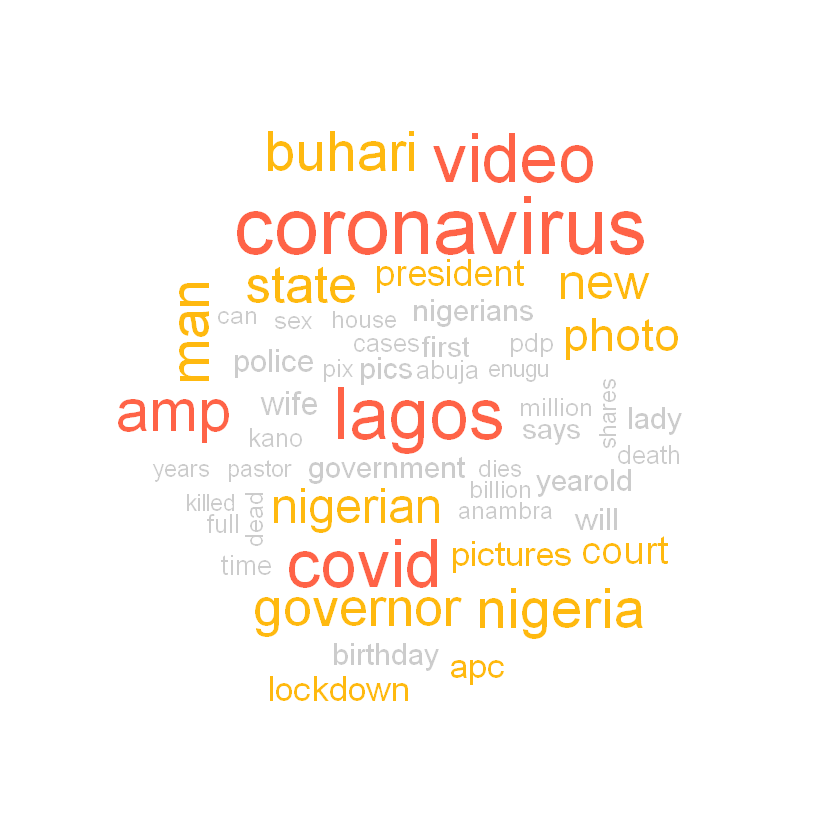

In [250]:
wordcloud(names(docmatrix_wc), docmatrix_wc, max.words=50, colors=c("grey80", "darkgoldenrod1", "tomato"))

Some of the most common words in the title include "Buhari", who is the president of Nigeria; "nigeria", nigerian", "coronavirus", and "covid". We could increase the `max.words` parameter and see what other frequent words there are.

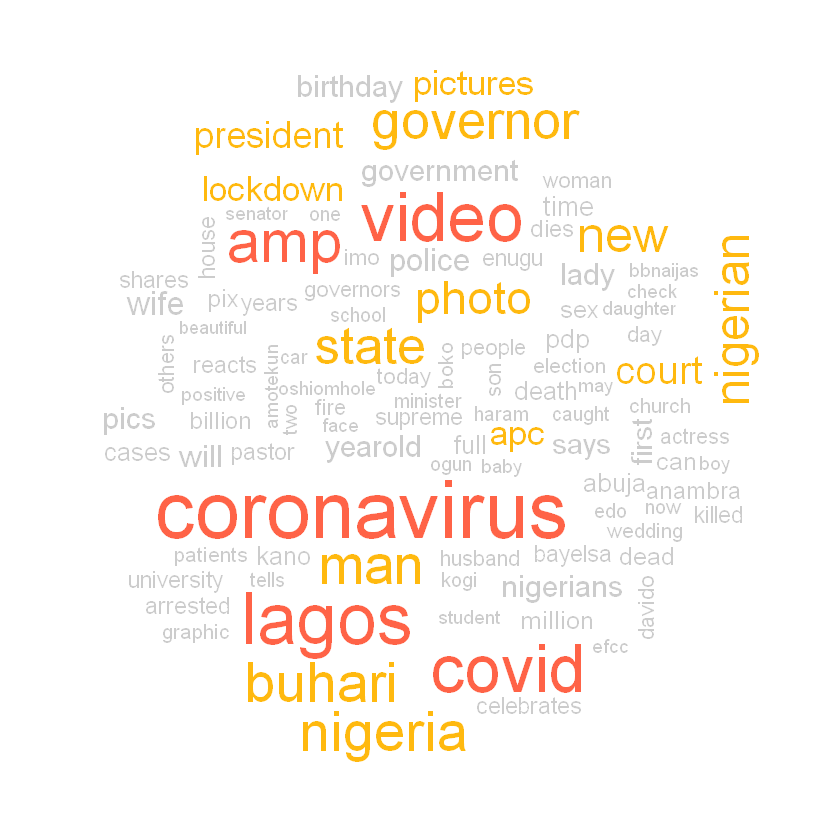

In [249]:
wordcloud(names(docmatrix_wc), docmatrix_wc, max.words=100, colors=c("grey80", "darkgoldenrod1", "tomato"))

Now, we create our training and test data.

We will use the `caret` package for the classification task. `SVM` with a linear kernel is quite a good classifier for this type of data set. `caret` makes this available. It however needs the `lattice` package to work.

In [326]:
nlv_ml <- nlv[1:15000,]
whole_set <- VCorpus(VectorSource(nlv_ml$title))

In [329]:
cleaned_whole_set <- cleanCorpus(whole_set)
cleaned_whole_set

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 15000

In [330]:
whole_matrix <- DocumentTermMatrix(cleaned_whole_set)
whole_matrix

<<DocumentTermMatrix (documents: 15000, terms: 15514)>>
Non-/sparse entries: 106061/232603939
Sparsity           : 100%
Maximal term length: 26
Weighting          : term frequency (tf)

The matrix sparsity is high. We could remove some of it.

In [331]:
#Remove sparse items from whole matrix
whole_matrix_non_sparse <- removeSparseTerms(whole_matrix, 0.999)

In [332]:
whole_matrix_non_sparse

<<DocumentTermMatrix (documents: 15000, terms: 1320)>>
Non-/sparse entries: 66229/19733771
Sparsity           : 100%
Maximal term length: 13
Weighting          : term frequency (tf)

In [333]:
inspect(whole_matrix_non_sparse[1:5,1:5])

<<DocumentTermMatrix (documents: 5, terms: 5)>>
Non-/sparse entries: 0/25
Sparsity           : 100%
Maximal term length: 9
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs aba abacha abandoned abba abia
   1   0      0         0    0    0
   2   0      0         0    0    0
   3   0      0         0    0    0
   4   0      0         0    0    0
   5   0      0         0    0    0


In [334]:
whole_matrix_non_sparse <- as.matrix(whole_matrix_non_sparse)

In [340]:
dim(whole_matrix_non_sparse)

[1] 15000  1320

In [343]:
#Add section to matrix
dtm_whole_matrix <- cbind(whole_matrix_non_sparse, nlv_ml$section)

In [344]:
colnames(dtm_whole_matrix)[ncol(dtm_whole_matrix)] <- "section"
df_whole_matrix <- as.data.frame(dtm_whole_matrix)
df_whole_matrix$section <- as.factor(df_whole_matrix$section)

In [345]:
dim(df_whole_matrix)

[1] 15000  1321

Divide data set into training and test sets.

In [346]:
training_set <- df_whole_matrix[train_ind,]
test_set <- df_whole_matrix[-train_ind,]

In [347]:
nl_model <- train(section ~ ., data = training_set, method = "svmLinear3")
nl_model

L2 Regularized Support Vector Machine (dual) with Linear Kernel 

10500 samples
 1320 predictor
   37 classes: 'Agriculture', 'Autos', 'Business', 'Car Talk', 'Career', 'Celebrities', 'Computers', 'Crime', 'Culture', 'Education', 'Entertainment', 'Events', 'Family', 'Fashion', 'Food', 'Forum Games', 'Gaming', 'General', 'Health', 'Investment', 'Jobs/Vacancies', 'Jokes Etc', 'Literature', 'Music/Radio', 'NYSC', 'Pets', 'Phones', 'Politics', 'Programming', 'Properties', 'Religion', 'Romance', 'Science/Technology', 'Sports', 'Travel', 'TV/Movies', 'Webmasters' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 10500, 10500, 10500, 10500, 10500, 10500, ... 
Resampling results across tuning parameters:

  cost  Loss  Accuracy   Kappa    
  0.25  L1    0.6609543  0.5937088
  0.25  L2    0.6473053  0.5833736
  0.50  L1    0.6523510  0.5857158
  0.50  L2    0.6314110  0.5660408
  1.00  L1    0.6375032  0.5697314
  1.00  L2    0.6140436  0.5470890

Accuracy was use

Now, we predict `section` values using the test set.

In [532]:
predicted_results <- predict(nl_model, newdata = test_set[,-1321])

In [533]:
head(predicted_results)

[1] Crime       Crime       Religion    Politics    Celebrities Politics   
37 Levels: Agriculture Autos Business Car Talk Career Celebrities ... Webmasters

We compare the results with the actual values in the test data and examine accuracy and other metrics.

In [534]:
sum(predicted_results == test_set$section)

[1] 2997

In [535]:
accuracy = sum(predicted_results == test_set$section) / nrow(test_set)
cat("Accuracy:", accuracy)

Accuracy: 0.666

About 2997 values in section were correctly predicted

In [368]:
results_df <- data.frame(predicted = predicted_results, actual = test_set$section, test_set[,-1321])

In [382]:
wrong_results_df %>% filter(predicted != actual) %>% head

predicted,actual,aba,abacha,abandoned,abba,abia,abroad,abubakar,abuja,...,yearold,years,yet,yobe,yoruba,young,youth,youths,zamfara,zlatan
Crime,Politics,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Politics,Celebrities,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jobs/Vacancies,Career,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Religion,Politics,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Politics,Education,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jobs/Vacancies,Career,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [391]:
gather(wrong_results_df[1,], key=key, value=value, -c("predicted", "actual")) %>%
    filter(value == 1) %>% spread(key=key, value=value)

Warning message:
"attributes are not identical across measure variables;
they will be dropped"

predicted,actual,church,edo,family,first,lady,late,pays,rape,state,visit
Crime,Politics,1,1,1,1,1,1,1,1,1,1


When we examine the first result among those with failed predictions, we see that when all the words, "church", "edo", "family", "first", "lady", "late", "pays", "rape", "state" and "visit" are present, the model saw the section as "Crime", instead of "Politics".

In [395]:
correct_results_df <- results_df %>% filter(predicted == actual)

gather(correct_results_df[1,], key=key, value=value, -c("predicted", "actual")) %>%
    filter(value == 1) %>% spread(key=key, value=value)

Warning message:
"attributes are not identical across measure variables;
they will be dropped"

predicted,actual,bauchi,friend,girlfriend,kills,man
Crime,Crime,1,1,1,1,1


For the first item under the right predictions, the model rightly interprets that when the words "bauchi", "friend", "girlfriend", "kills" and "man" are in the same set, it should be "Crime".

We can make a better visualization of these interpretations.

In [486]:
#Function to make raster plot
plot_raster <- function(df){
  # x_df <- subset(df, item==1)
  x_df <- df
  x_cleaned_df <- (x_df[, colSums(x_df !=0 ) > 0])
  x_df1 <- x_cleaned_df[,-2]
  x_df2 <- x_cleaned_df[,-1]
  x_df1$x <- rep(1,times=nrow(x_df1))
  x_df2$x <- rep(2,times=nrow(x_df2))
  x_dfx <- bind_rows(x_df1,x_df2)
  x_dfx$actual[1:nrow(x_df2)] <- x_dfx$predicted[1:nrow(x_df1)]
  x_dfx <- x_dfx[,-1]
  return (gather(x_dfx, key=key, value=value, -c("x", "actual")) %>% 
    ggplot(aes(x=actual, y=key, fill=value)) + 
    geom_raster() + facet_grid(~x)+theme_gray()  + theme(axis.text.x = element_text(angle = 90,vjust=.3)) + 
    xlab("prediction  /  actual") + 
    scale_y_discrete(guide = guide_axis(check.overlap = TRUE)))
}


### 3. Results Visualization

In [487]:
#Create function to peek into sparse matrix
peekMatrix <- function(df, x){
    (df[1:x][, colSums(df[1:x] !=0 ) > 0]) %>% .[rowSums(.[,-c(1,2)] != 0) > 0,]
}

Warning message:
"attributes are not identical across measure variables;
they will be dropped"

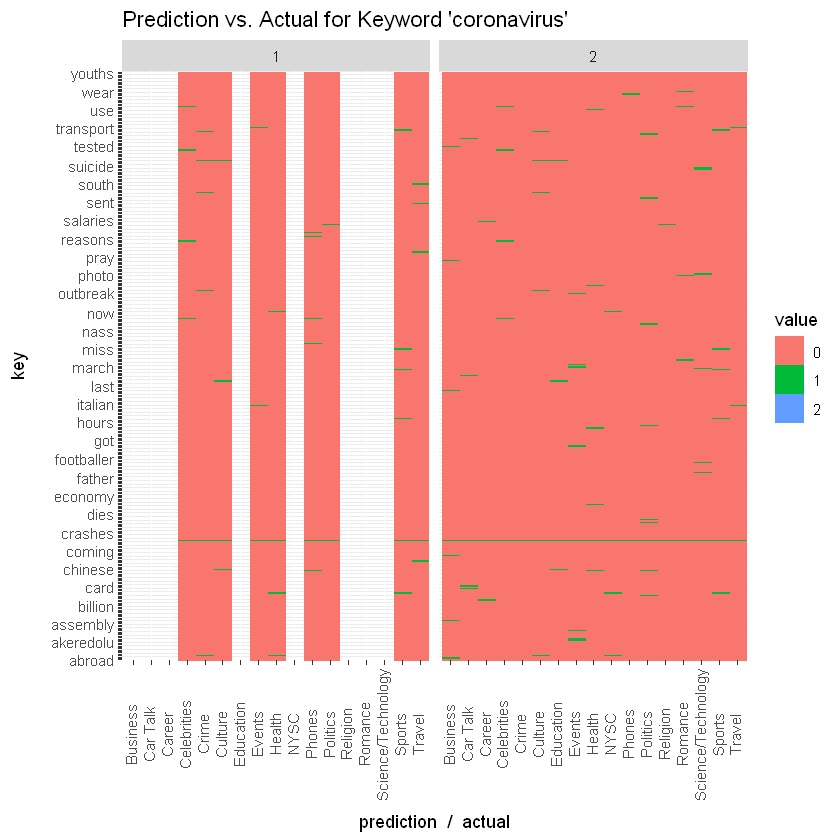

In [571]:
df <- subset(results_df, coronavirus!=0)
plot_raster(df) + ggtitle("Prediction vs. Actual for Keyword 'coronavirus'")

Under predictions, the model has predicted **coronavirus** to be present in `Celebrities`, `Crime`, `Culture`, `Events`, `Health`, `Phones`, `Politics`, `Sports` and `Travel`. In reality, it is in many more sections than that. But the model does well in recognizing some of these sections.

In [449]:
sum(df$predicted == df$actual)/nrow(df) * 100

[1] 69.81132

And specifically for the **coronavirus** keyword, the model gets it right 69.8% of the time.

When we peek into the matrix, we see the combinations that yield the respective predictions

In [454]:
peekMatrix(df, 20)

,predicted,actual,abroad,abubakar,access,accused,activities,actor
3977,Culture,Culture,0,0,0,0,1,0
4120,Politics,Politics,0,1,0,0,0,0
4180,Health,Business,0,0,1,0,0,0
4447,NYSC,NYSC,0,0,0,0,1,0
4522,Celebrities,Celebrities,0,0,0,0,0,1
4685,Travel,Health,1,0,0,0,0,0
4908,Health,Sports,0,0,0,0,1,0
5383,Health,Health,0,0,0,1,0,0


We could try this for other keywords in the frontpage titles.

Warning message:
"attributes are not identical across measure variables;
they will be dropped"

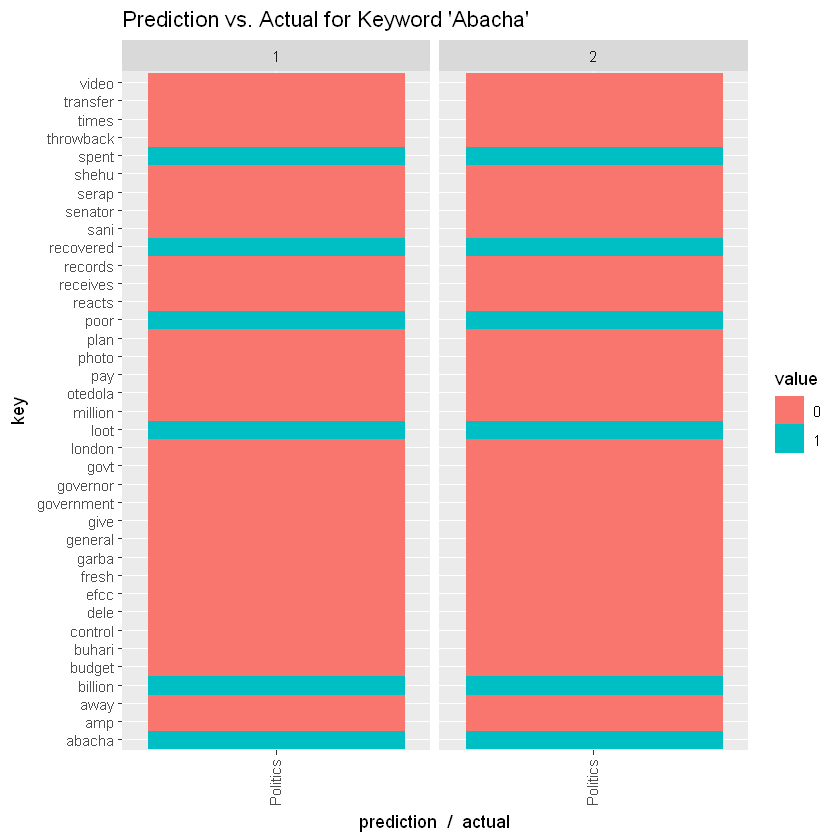

In [572]:
df <- subset(results_df, abacha!=0)
plot_raster(df) + ggtitle("Prediction vs. Actual for Keyword 'Abacha'")

For the **abacha** keyword, the model gets it right all the time.

Warning message:
"attributes are not identical across measure variables;
they will be dropped"

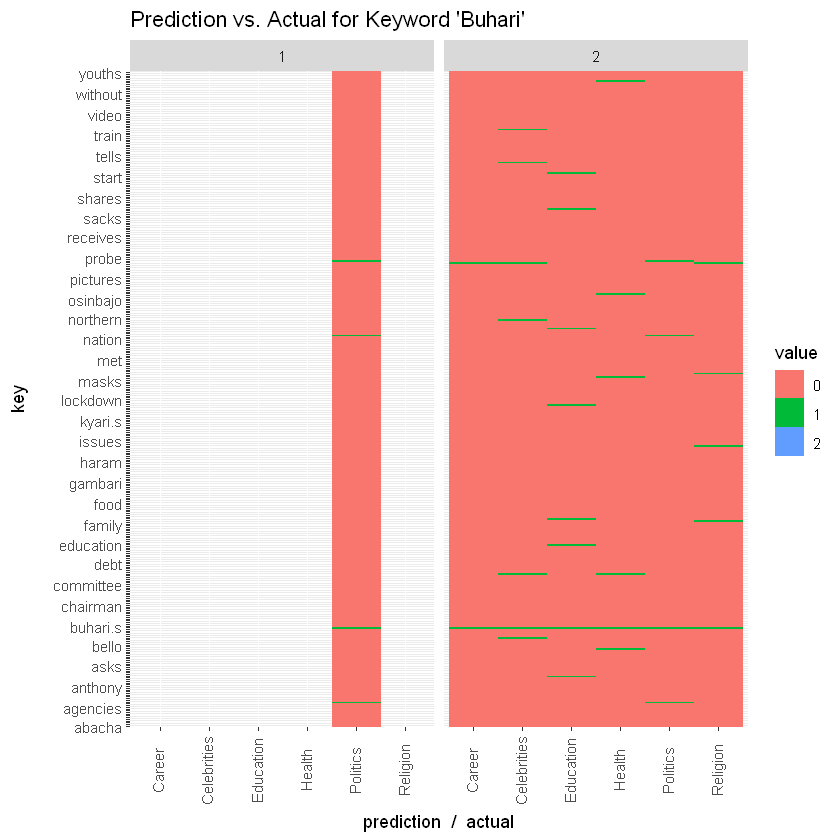

In [566]:
df <- subset(results_df, buhari!=0)
plot_raster(df) + ggtitle("Prediction vs. Actual for Keyword 'Buhari'")

For the **buhari** keyword, the model gets it right 96% of the time.

In [465]:
sum(df$predicted == df$actual)/nrow(df) * 100

[1] 96.98795

In [466]:
peekMatrix(df, 10)

,predicted,actual,abacha,abba,abubakar,abuja
1816,Politics,Politics,1,0,0,0
2685,Politics,Politics,0,1,0,0
2718,Politics,Politics,0,1,0,0
4537,Politics,Politics,0,1,0,0
5723,Politics,Politics,1,0,0,0
6952,Politics,Politics,0,0,0,1
8495,Politics,Politics,0,0,0,1
10271,Politics,Politics,0,0,0,1
10896,Politics,Politics,0,0,1,0
12655,Politics,Politics,0,1,0,0


Now, we examine the **rape** keyword

Warning message:
"attributes are not identical across measure variables;
they will be dropped"

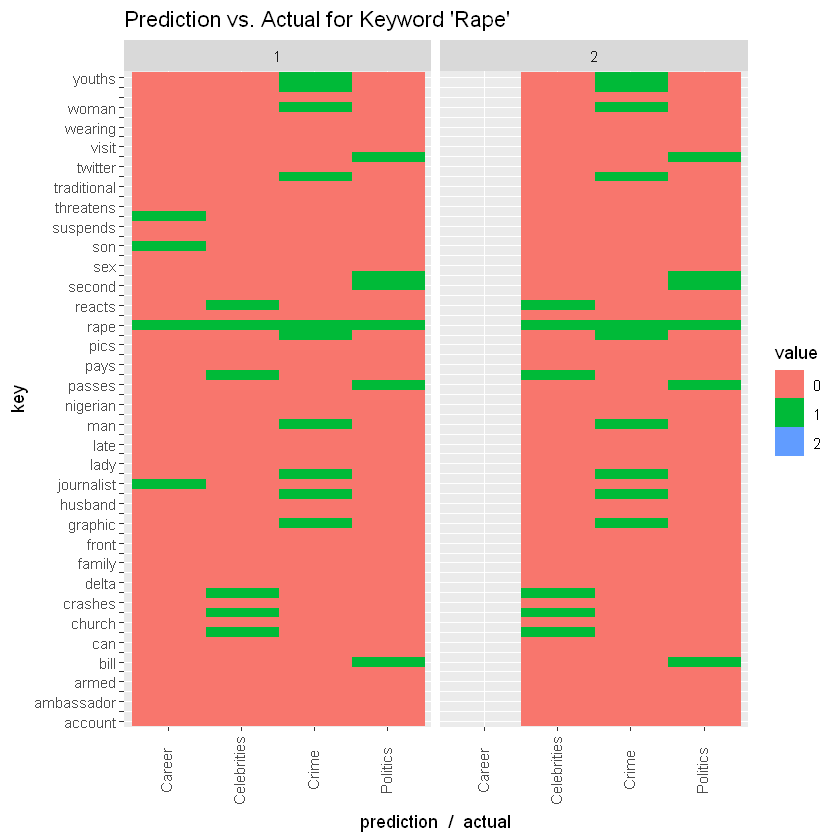

In [567]:
df <- subset(results_df, rape!=0)
plot_raster(df) + ggtitle("Prediction vs. Actual for Keyword 'Rape'")

In [525]:
sum(df$predicted == df$actual)/nrow(df) * 100

[1] 84.61538

The model gets it right 84% of the time.

In [480]:
(df[, colSums(df !=0 ) > 0]) %>% .[rowSums(.[,-c(1,2)] != 0) > 0, ] %>% .[,c(1,2)]

,predicted,actual
1,Crime,Politics
102,Crime,Crime
2937,Career,Politics
3508,Crime,Crime
5105,Crime,Crime
6312,Crime,Crime
7847,Crime,Crime
8728,Crime,Crime
10585,Crime,Crime
10675,Celebrities,Celebrities


We see that in one instance, "Career" was predicted instead of "Politics" for the **rape** keyword

Warning message:
"attributes are not identical across measure variables;
they will be dropped"

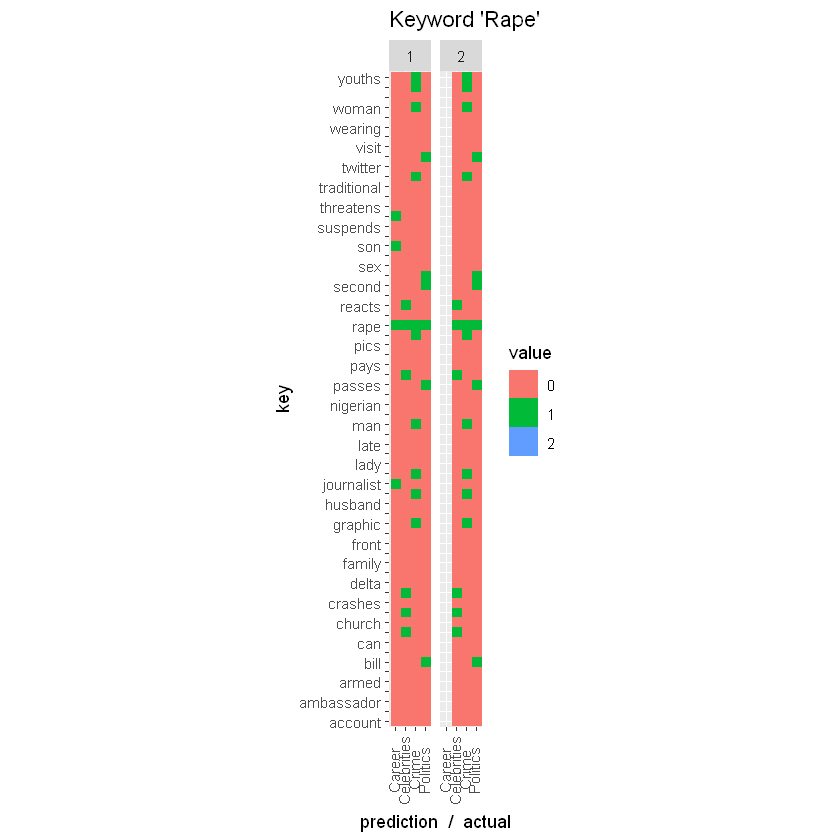

In [570]:
#tight_layout
plot_raster(df) + coord_equal() + ggtitle("Keyword 'Rape'")

Lastly, we examine the confusion matrix:

In [556]:
#A peek into the confusion matrix
confusionMatrix(results_df$predicted, reference = results_df$actual)$table %>% .[1:5,1:5]

             Reference
Prediction    Agriculture Autos Business Car Talk Career
  Agriculture           1     0        0        0      0
  Autos                 0     0        0        0      0
  Business              0     0       29        1      5
  Car Talk              0     2        0       22      1
  Career                0     0        2        0      4

When visualized, we see that for most of the sections, the correct prediction was made. There were a few sections where probably not enough values to form a cell. These appear to be "Programming", "Pets", etc. Red cells mean zero. For example, there were no successful predictions for "Webmasters". Light cells mean successful predictions. Most of the cells along the diagonal are light, correlating with the fairly good accuracy obtained.

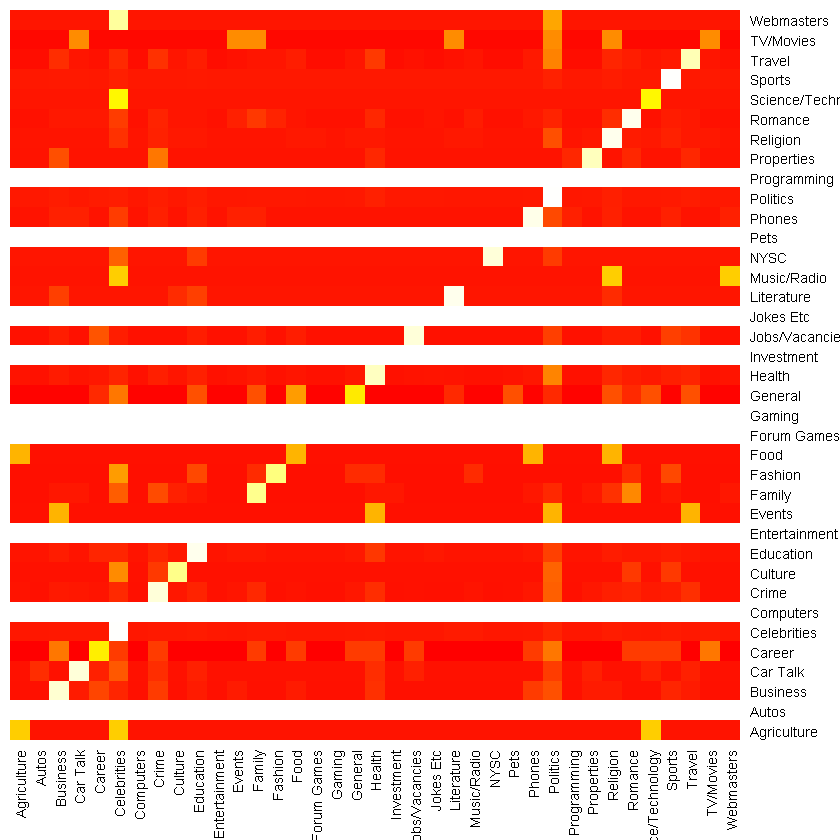

In [555]:
confusionMatrix(results_df$predicted, reference = results_df$actual)$table %>% 
heatmap(t(.)[1:ncol(.),], Rowv=NA, Colv=NA, col=heat.colors(256))

Most "Autos" were predicted as "Car Talk" or "Politics".

In [543]:
subset(results_df, actual=="Autos")[,1:2]

,predicted,actual
277,Car Talk,Autos
1033,Politics,Autos
3418,Car Talk,Autos
9288,Politics,Autos
